In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import pydot
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#Upload the dataset from local drive
from google.colab import files
uploaded = files.upload()

Saving airquality.csv to airquality.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['airquality.csv']))
#Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()
#Gives first 5 rows

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [5]:
df.tail()
#Gives last 5 rows

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29
152,153,20.0,223.0,11.5,68,9,30


In [6]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#We remove the Unnamed column

In [8]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [9]:
df.dtypes
#Gives data type of columns

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object

In [10]:
#Change all int columns to float
#df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)
df.dtypes        

float64
float64
float64


Ozone      float64
Solar.R    float64
Wind       float64
Temp       float64
Month      float64
Day        float64
dtype: object

In [11]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('Temp',axis=1)
y = df['Temp']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Random Forest Regressor

In [13]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
26,57.0,67.547
135,77.0,78.234
63,81.0,81.014
105,80.0,84.418
24,57.0,62.413
7,59.0,62.285
44,80.0,85.842
101,92.0,84.745
112,77.0,69.959
54,76.0,80.249


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.095869565217393
Mean Squared Error: 26.694967173913042
Root Mean Squared Error: 5.1667172531417895


In [17]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.1 degrees.
Accuracy: 94.52 %.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


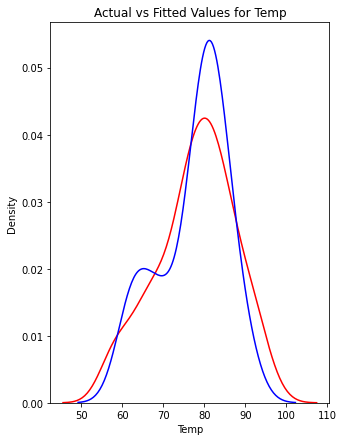

In [18]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temp')


plt.show()
plt.close()

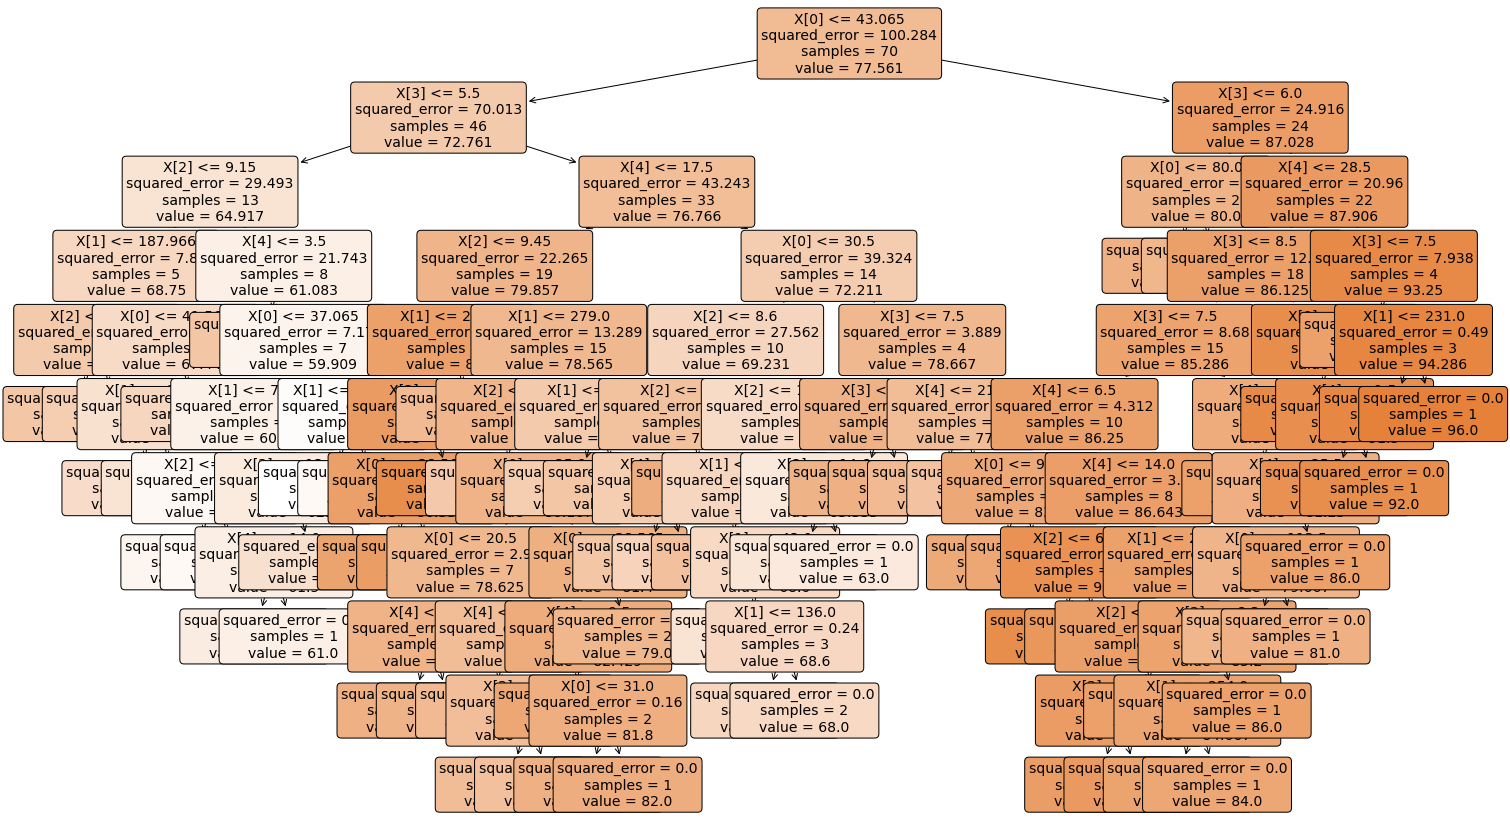

In [19]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot
Tree = regressor.estimators_[5]
plt.figure(figsize=(25,15))
tree.plot_tree(Tree, filled=True, rounded=True, fontsize=14);

In [ ]:
# Decision Tree Regressor

In [20]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
26,57.0,69.0
135,77.0,77.0
63,81.0,74.0
105,80.0,86.0
24,57.0,62.0
7,59.0,57.0
44,80.0,91.0
101,92.0,85.0
112,77.0,74.0
54,76.0,75.0


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.717391304347826
Mean Squared Error: 35.32608695652174
Root Mean Squared Error: 5.943575267170573


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


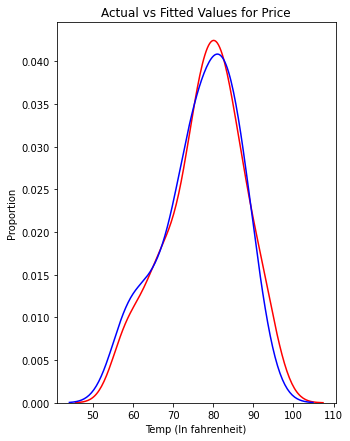

In [24]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Temp (In fahrenheit)')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [25]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.72 degrees.
Accuracy: 93.71 %.


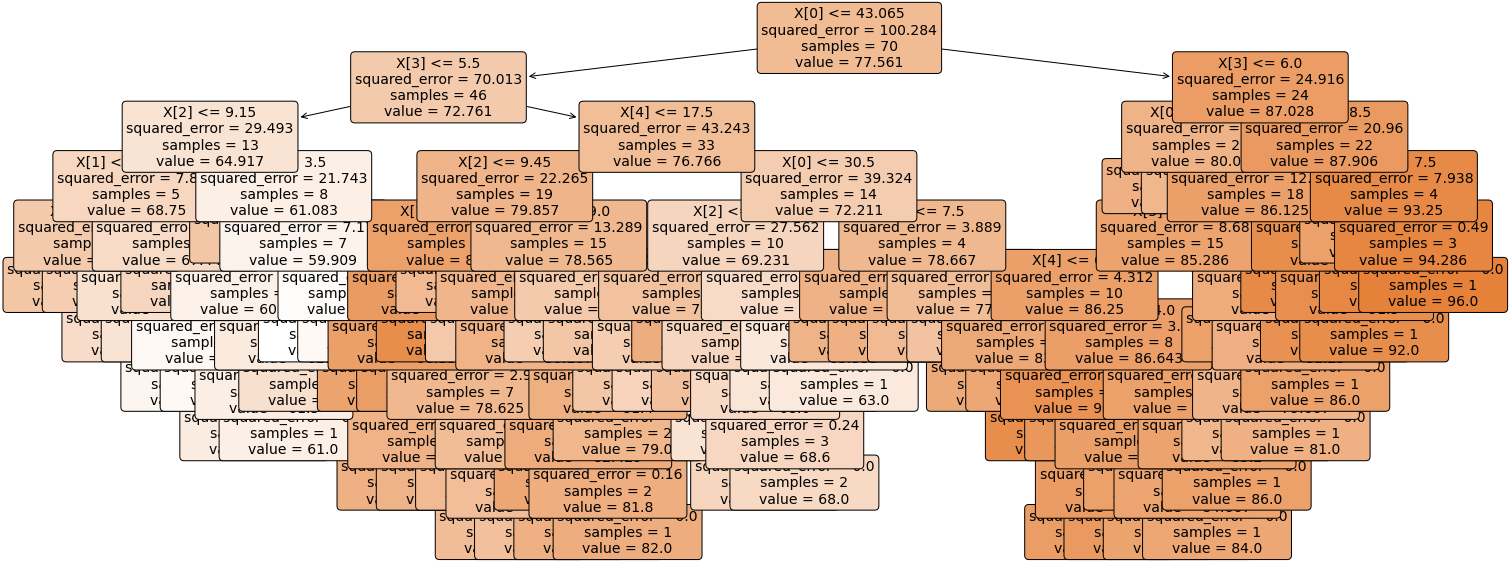

In [26]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(Tree, filled=True, rounded=True, fontsize=14);

In [ ]:
# Support Vector Regression

In [27]:
svr = SVR(kernel = 'linear',C = 1000)

In [28]:
sc= StandardScaler().fit(X_train)

In [29]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[-3.05651119e-02,  1.09264291e-03, -5.13986349e-01,
        -1.40771370e+00,  1.33870135e+00],
       [-4.92023047e-01,  6.09007172e-01, -9.94675895e-01,
         1.43427433e+00, -2.63035570e-01],
       [-3.61384559e-01,  5.85656601e-01, -1.74676080e-01,
         1.32803179e-02, -1.40713337e+00],
       [ 7.16382968e-01, -3.36690963e-01, -3.32968020e-02,
         7.23777325e-01, -1.48625789e-01],
       [-3.05651119e-02, -1.39914195e+00,  1.91773724e+00,
        -1.40771370e+00,  1.10988179e+00],
       [-7.85959646e-01, -1.01385753e+00,  1.12601328e+00,
        -1.40771370e+00, -8.35084471e-01],
       [-3.05651119e-02,  1.70648402e+00,  1.12601328e+00,
        -6.97216689e-01, -1.48625789e-01],
       [-3.05651119e-02,  4.22202602e-01, -3.44331215e-01,
         7.23777325e-01, -6.06264911e-01],
       [-7.20640401e-01,  8.54188170e-01,  1.60670283e+00,
         7.23777325e-01,  6.52242673e-01],
       [-3.05651119e-02,  7.49110599e-01, -9.94675895e-01,
        -6.97216689e-01

In [30]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)

In [31]:
y_train_pred = svr.predict(X_train_std)

In [32]:
y_test_pred

array([72.96251419, 82.47762837, 77.92957589, 84.62364698, 69.06638371,
       67.34073169, 75.97375487, 81.8147312 , 75.38010398, 76.88162276,
       72.77616064, 76.50489946, 78.21625751, 77.81207443, 78.64320702,
       76.34661581, 75.06482308, 80.57291445, 90.71272003, 86.1005744 ,
       74.92541527, 62.41756801, 75.29417661, 81.40826076, 73.33131291,
       98.22596892, 76.65189554, 74.76017777, 81.02286273, 76.06353309,
       72.1348893 , 94.48468602, 79.92698683, 81.00495642, 64.17689547,
       79.4062667 , 87.3196399 , 85.30025432, 66.37308432, 80.8405861 ,
       77.91366391, 76.55140667, 71.59345875, 71.48152419, 72.91304817,
       75.82588928])

In [33]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Squared Error: 38.10411248234109
Root Mean Squared Error: 6.1728528641415945


In [34]:
r2_score(y_train,y_train_pred)

0.4878894287539195

In [35]:
r2_score(y_test,y_test_pred)

0.5698630979651224

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


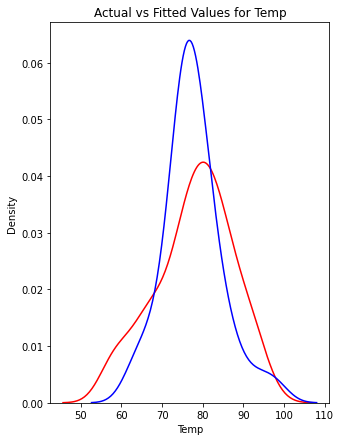

In [36]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temp')


plt.show()
plt.close()

In [37]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.72 degrees.
Accuracy: 93.71 %.
